#### 3. Data Understanding

Nachdem im Rahmen des Business Understandings die Begrifflichkeiten geklärt wurden und ein Verständnis für die relevanten Konstrukte besteht, werden im Folgenden zunächst die verwendeten Python-Bibliotheken kurz erklärt. Kenntnis über die Standard-Libraries wird vorausgesetzt.

##### *3.1 Relevante Python-Bibliotheken*

Python ist eine leistungsstarke sowie verständliche Programmiersprache und bietet sich aufgrund der zahlreichen Funktionen und Bibliotheken für Machine Learning Projekte an (McKinney, 2011). 

*Pandas (Version: 1.3.4)*: Pandas stellt eines der zentralen Python-Bibliotheken zur Datenmanipulation und -analyse dar. Das grundlegende Konzept von Pandas ist der sogenannte Dataframe, eine zweidimensionale tabellarische Datenstruktur mit Zeilen- und Spaltenbeschriftungen. Häufig wird Pandas in Kombination mit NumPy verwendet (hier Version: 1.20.3). Es ermöglicht dem Nutzer die schnelle Durchführung zahlreicher mathematischer Operationen auf Arrays (Nelli, 2018). 

*Matplotlib (Version: 3.7.0)*: Matplotlib ist ein effizientes Paket zur Erstellung einfacher und komplexer Plots und bietet vielfältige Visualisierungsmöglichkeiten (z.B. Diagramme, Histogramme, Streudiagramme). Das Konzept von Matplolib ist dreiteilig aufgebaut. Innerhalb der Pylab-Schnittstelle wird der Plot erstellt. Das Frontend stellt de Klassen und Funktionalität zum Erstellen und Verwalten der Diagramme bereit, die im Backend u.a. als Vektorgrafik, PNG oder Postscript-Hardcopy ausgegeben werden (Ari und Ustazhanov 2014).

*Seaborn (Version: 0.12.2*): Seaborn ist spezialisiert auf die Erstellung statistischer Grafiken und bietet eine High-Level-Schnittstelle zu Matplotlib. Außerdem ist Seaborn für die enge Integration mit Pandas-Datenstrukturen konzipiert. Vollständige Grafiken können mit wenigen Argumenten und nur einem Funktionsaufruf erstellt werden und bietet sich für die schnelle explorative Datenanalyse an (Waskom 2021).

*SciKit-learn (Version: 1.2.1)*: SciKit Learn ermöglicht eine einfache und schnelle Integration von Methoden des maschinellen Lernens (überwacht und unüberwacht) und umfasst eine große Bandbreite an Modellen für die Klassifikation und Regression. Es basiert auf anderen Bibliotheken wie Matplotlib und NumPy und bietet auch Werkzeuge zur Datenvorbereitung, darunter auch das im Modeling eingesetzte One-Hot-Encoding.Außerdem bringt es Tools zur Auswahl und Validierung von Modellen (z.B. Train-Test-Split, Kreuzvalidierung und Hyperparameter-Tuning) sowie zur Modellbewertung (Kramer, 2016). 


In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

##### *3.1 Allgemeine Informationen zum Datensatz*

Für die vorliegende Projektarbeit wurde der [Kaggle Datensatz](https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset) "IBM HR Analytics Employee Attrition & Performance" herangezogen. Dieser bietet sich aufgrund der Bandbreite an erhobenen Variablen für prädiktive Analysen der Mitarbeiterfluktuation an. Allerdings handelt es sich um einen fiktiven Datensatz, der von IBM-Datenwissenschaftlern erstellt wurde.


In [2]:
# Pfad zur CSV-Datei
path = r"..\WA_Fn-UseC_-HR-Employee-Attrition.csv"

# CSV-Datei einlesen
df = pd.read_csv(path, sep=',')

# Spaltennamen bereinigen
df.columns = df.columns.str.strip()

df.head()

FileNotFoundError: [Errno 2] No such file or directory: '..\\WA_Fn-UseC_-HR-Employee-Attrition.csv'

Insgesamt besteht der Datensatz aus 1.470 Erhebungen (Zeilen) und 35 Features (Variablen). Die folgende Tabelle gibt einen Überblick über die Merkmale, deren Datentypen sowie Ausprägungen. Die Zielvariable "Attrition" ist binär und gibt an, ob die Person das Unternehmen verlassen hat oder nicht. Da keine eindeutige Information darüber vorliegt, ob das Ausscheiden vom Unternehmen mitarbeiterinduziert oder durch den Arbeitgeber veranlasst wurde, wird pauschal von freiwilliger Mitarbeiterfluktuation ausgegangen. Neben "Attrition" gibt es noch 9 weitere ordinale Variablen, 10 nominal skalierte Variablen und 15 metrische bzw. verhältnisskalierte Variablen im Datensatz. Drei Variablen weisen nur eine Ausprägung auf und können deshalb keinem Skalenniveau zugeordnet werden. Da der Datensatz keiner echten Erhebung unterliegt und es sich um fiktive Daten handelt, sind keine fehlenden Werte vorhanden. Die Datenbereinigung entfällt somit größtenteils.


| #  | Variable                                            | Dtype                              | Ausprägung                                                                                                                                                                                                                           | Beschreibung                                                                                              |
| -- | --------------------------------------------------- | ---------------------------------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------ | --------------------------------------------------------------------------------------------------------- |
| 1  | <font >Age</font>                      | <font >integer</font> | <font >18 - 60</font>                                                                                                                                                                                                   | <font >Alter</font>                                                                          |
| 2  | <font >Attrition</font>                | <font >object</font>  | <font >Yes,<br>No</font>                                                                                                                                                                                                | <font >Befragte Person<br>hat das Unternehmen verlassen</font>                               |
| 3  | <font >BusinessTravel</font>           | <font >object</font>  | <font >Non-Travel,<br>Travel_Rarely,<br>Travel_Frequently</font>                                                                                                                                                         | <font >Häufigkeit von Dienstreisen</font>                                                    |
| 4  | <font >DailyRate</font>                  | <font >integer</font>   | <font >102 - 1499</font>                                                                                                                                                                                                  | <font >Gehaltslevel (unklar)</font>                                                            |
| 5  | <font >Department</font>               | <font >object</font>  | <font >Human Resources,<br>Research & Development,<br>Sales</font>                                                                                                                                                      | <font >Abteilung</font>                                                                      |
| 6  | <font >DistanceFromHome</font>         | <font >integer</font> | <font >1 - 29</font>                                                                                                                                                                                                    | <font >Entfernung zwischen<br>Arbeitsplatz und Wohnung</font>                                |
| 7  | <font >Education</font>                | <font >integer</font> | <font >1 - Below College<br>2 - College<br>3 - Bachelor<br>4 - Master<br>5 - Doctor</font>                                                                                                                              | <font >Bildungsniveau</font>                                                                 |
| 8  | <font >EducationField</font>           | <font >object</font>  | <font >Life Sciences,<br>Other,<br>Medical,<br>Marketing,<br>Technical Degree,<br>Human Resources</font>                                                                                                                | <font >Ausbildungsbereich</font>                                                             |
| 9  | <font >EmployeeCount</font>             | <font >integer</font>  | <font >1</font>                                                                                                                                                                                                          | <font >irrelevant,<br>da nur eine Ausprägung</font>                                           |
| 10 | <font >EmployeeNumber</font>           | <font >integer</font> | <font >1 - 1068</font>                                                                                                                                                                                                  | <font >Anzahl der Mitarbeiter<br>im Unternehmen</font>                                       |
| 11 | <font >EnvironmentSatisfaction</font>  | <font >integer</font> | <font >1 - Low<br>2 - Medium<br>3 - High<br>4 - Very High</font>                                                                                                                                                        | <font >Zufriedenheit<br>mit der Arbeitsumgebung</font>                                       |
| 12 | <font >Gender</font>                   | <font >object</font>  | <font >Male,<br>Female</font>                                                                                                                                                                                           | <font >Geschlecht</font>                                                                     |
| 13 | <font >HourlyRate</font>               | <font >integer</font> | <font >30 - 100</font>                                                                                                                                                                                                  | <font >Stundenlohn</font>                                                                    |
| 14 | <font >JobInvolvement</font>           | <font >integer</font> | <font >1 - Low<br>2 - Medium<br>3 - High<br>4 - Very High</font>                                                                                                                                                        | <font >Job-Engagement</font>                                                                 |
| 15 | <font >JobLevel</font>                   | <font >integer</font>   | <font >1 - 5</font>                                                                                                                                                                                                       | <font >Ausprägungen unklar</font>                                                              |
| 16 | <font >JobRole</font>                  | <font >object</font>  | <font >Sales Executive,<br>Research Scientist,<br>Laboratory Technician,<br>Manufacturing Director,<br>Healthcare, Representative,<br>Manager,<br>Sales Representative,<br>Research Director,<br>Human Resources</font> | <font >Stellenbeschreibung</font>                                                            |
| 17 | <font >JobSatisfaction</font>          | <font >integer</font> | <font >1 - Low<br>2 - Medium<br>3 - High<br>4 - Very High</font>                                                                                                                                                        | <font >Zufriedenheit<br>mit der Arbeit</font>                                                |
| 18 | <font >MaritalStatus</font>            | <font >object</font>  | <font >Married,<br>Divorced,<br>Single</font>                                                                                                                                                                           | <font >Familienstand</font>                                                                  |
| 19 | <font >MonthlyIncome</font>            | <font >integer</font> | <font >1.009 - 19.999</font>                                                                                                                                                                                            | <font >monatliches Einkommen</font>                                                          |
| 20 | <font >MonthlyRate</font>                | <font >integer</font>   | <font >2.094 -26.999</font>                                                                                                                                                                                               | <font >unklar</font>                                                                           |
| 21 | <font >NumCompaniesWorked</font>       | <font >integer</font> | <font >0 - 9 </font>                                                                                                                                                                                                    | <font >Anzahl der<br>bisherigen Arbeitgeber</font>                                           |
| 22 | <font >Over18</font>                    | <font >object</font>   | <font >Yes</font>                                                                                                                                                                                                        | <font >irrelevant,<br>da nur eine Ausprägung</font>                                           |
| 23 | <font >OverTime</font>                 | <font >object</font>  | <font >Yes,<br>No</font>                                                                                                                                                                                                | <font >Überstunden</font>                                                                    |
| 24 | <font >PercentSalaryHike</font>          | <font >integer</font>   | <font >11 - 25</font>                                                                                                                                                                                                     | <font >prozentuale Gehaltserhöhung<br>(pro Jahr?)</font>                                       |
| 25 | <font >PerformanceRating</font>          | <font >integer</font>   | <font >1 - Low<br>2 - Good<br>3 - Excellent<br>4 - Outstanding</font>                                                                                                                                                     | <font >Leistungsbewertung<br>(aus dienstlicher Beurteilung<br>oder Selbsteinschätzung?)</font> |
| 26 | <font >RelationshipSatisfaction</font> | <font >integer</font> | <font >1 - Low<br>2 - Medium<br>3 - High<br>4 - Very High</font>                                                                                                                                                        | <font >Zufriedenheit mit<br>sozialem Umfeld am Arbeitsplatz</font>                           |
| 27 | <font >StandardHours</font>             | <font >integer</font>  | <font >80</font>                                                                                                                                                                                                         | <font >irrelevant,<br>da nur eine Ausprägung</font>                                           |
| 28 | <font >StockOptionLevel</font>           | <font >integer</font>   | <font >1 - 3</font>                                                                                                                                                                                                       | <font >Aktienoptionen (unklar)</font>                                                          |
| 29 | <font >TotalWorkingYears</font>        | <font >integer</font> | <font >0 - 40</font>                                                                                                                                                                                                    | <font >Arbeitsjahre</font>                                                                   |
| 30 | <font >TrainingTimesLastYear</font>      | <font >integer</font>   | <font >0 - 6</font>                                                                                                                                                                                                       | <font >Zeit für Fort-/Weiterbildung<br>in Stunden (unklar)</font>                              |
| 31 | <font >WorkLifeBalance</font>          | <font >integer</font> | <font >1 - Bad<br>2 - Good<br>3 - Better<br>4 - Best</font>                                                                                                                                                             | <font >Work-Life-Balance</font>                                                              |
| 32 | <font >YearsAtCompany</font>           | <font >integer</font> | <font >0 - 40</font>                                                                                                                                                                                                    | <font >Anzahl der Jahre<br>im Unternehmen</font>                                             |
| 33 | <font >YearsInCurrentRole</font>       | <font >integer</font> | <font >0 - 18</font>                                                                                                                                                                                                    | <font >Anzahl der Jahre<br>auf der aktuellen Stelle</font>                                   |
| 34 | <font >YearsSinceLastPromotion</font>  | <font >integer</font> | <font >0 - 15</font>                                                                                                                                                                                                    | <font >Jahre seit der<br>letzten Beförderung</font>                                          |
| 35 | <font >YearsWithCurrManager</font>     | <font >integer</font> | <font >0 - 17</font>                                                                                                                                                                                                    | <font >Anzahl der Jahre<br>unter dem aktuellen Vorgesetzten</font>                           |


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

Allerdings scheint der Datensatz hinsichtlich der Verteilung der Variable "Attrition" unausgeglichen. So haben 1.233 (84 %) Mitarbeiter das Unternehmen nicht verlassen, lediglich 237 (16 %) sind ausgeschieden. Dies könnte die weitere Datenanalyse beeinflussen und muss beim Modeling beachtet werden.

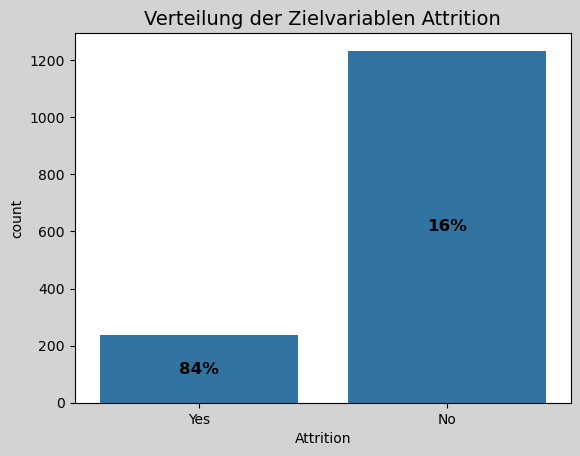

In [ ]:
# Verteilung der Zielvariablen Attrition
attrition_percentage = df["Attrition"].value_counts(normalize=True) * 100

# Diagramm erstellen
plt.figure(facecolor='lightgrey')
ax = sns.countplot(x='Attrition', data=df)
ax.set_title('Verteilung der Zielvariablen Attrition', size=14)

for p in ax.patches:
    label = p.get_x() + p.get_width() / 2
    category = df['Attrition'].value_counts().index[int(label)] 
    percentage = attrition_percentage[category]
    
    ax.text(p.get_x() + p.get_width() / 2., p.get_height() / 2.,  
            f'{percentage:.0f}%',  
            ha='center', va='center',  
            fontsize=12,
            weight='bold')

Wie bereits erwähnt enthält der Datensatz einige Variablen, die für die weitere Datenenalyse keine Relevanz haben. Die drei Variablen "EmployeeCount", "Over18" und "StandardHours" besitzen nur eine Ausprägung und werden deshalb ausgeschlossen. Zudem gibt es mehrere Variablen, die auf monetäre Anreize verweisen ("HourlyRate", "DailyRate", "MonthlyRate", "PercentSalaryHike", "StockOptionLevel", "MonthlyIncome"). Bei den Gehaltssätzen gibt es 2 Arten: Monatssätze und Tagessätze. Einige Unternehmen wenden den Stundensatz an, der jedoch denselben Grundsätzen folgt wie der Tagessatz. Der Hauptunterschied besteht darin, dass tageweise Beschäftigte auf der Grundlage der tatsächlich geleisteten Arbeitstage bezahlt werden, während monatsweise Beschäftigte i.d.R. einen festen Betrag pro Lohnperiode erhalten. Da die Aussagekraft der Gehaltsvariablen nicht eindeutig ist, wird in späteren Auswertungen nur das monatliche Einkommen herangezogen. 

Darüber hinaus wurden die Variablen EducationField und EmployeeNumber aus der weiteren Betrachtung augeschlossen. (<font color='red'>Welche Gründe gibt es hierfür?</font>)

In [ ]:
# Liste der relevanten Spalten
behaltene_spalten = ['Attrition','Age','BusinessTravel','Department','DistanceFromHome',
                     'Education','EnvironmentSatisfaction','Gender','JobInvolvement','JobLevel', 'JobRole',
                     'JobSatisfaction','MaritalStatus','MonthlyIncome','NumCompaniesWorked',
                     'OverTime','RelationshipSatisfaction', 'PerformanceRating',
                     'TotalWorkingYears','WorkLifeBalance','YearsAtCompany','YearsInCurrentRole',
                     'YearsSinceLastPromotion','YearsWithCurrManager']

# Behalten nur der relevanten Spalten
df = df.loc[:, behaltene_spalten]

# Anzeigen der ersten Zeilen des neuen DataFrames
df.head()

,Attrition,Age,BusinessTravel,Department,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,...,NumCompaniesWorked,OverTime,RelationshipSatisfaction,PerformanceRating,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,Yes,41,Travel_Rarely,Sales,1,2,2,Female,3,2,...,8,Yes,1,3,8,1,6,4,0,5
1,No,49,Travel_Frequently,Research & Development,8,1,3,Male,2,2,...,1,No,4,4,10,3,10,7,1,7
2,Yes,37,Travel_Rarely,Research & Development,2,2,4,Male,2,1,...,6,Yes,2,3,7,3,0,0,0,0
3,No,33,Travel_Frequently,Research & Development,3,4,4,Female,3,1,...,1,Yes,3,3,8,3,8,7,3,0
4,No,27,Travel_Rarely,Research & Development,2,1,1,Male,3,1,...,9,No,4,3,6,3,2,2,2,2


##### *3.2 Deskriptive Statistik*

Um ein besseres Verständnis über den Datensatz zu bekommen, werden im Folgenden die Lageparameter sowie die Verteilung ausgewählter Variablen genauer beleuchtet. Beim Alter zeigt sich eine mittlere Tendenz um 36 Jahre, wobei die Streuung (*SD = 9.1*) relativ breit ist. Eine ähnliche Streuung zeigt sich auch bei der Entfernung vom Unternehmen zum Zuhause (*M = 9.2, SD = 8.1*). Im Schnitt scheinen die Personen mäßig zufrieden zu sein, sowohl mit ihrer Arbeitsumgebung (*M = 2.7, SD = 1.1*) als auch mit der Arbeit an sich (*M = 2.7, SD = 1.1*) und den zwischenmenschlichen Beziehungen (*M = 2.7, SD = 1.1*). Dementsprechend deutet auch das Arbeitsengagement auf eine moderate Beteiligung (*M = 2.7, SD = 0.7*) der Personen hin. Die Work-Life-Balance wird im Mittel mit 2.8 (*SD = 0.7*) von maximal 4 bewertet. Die meisten Mitarbeiter haben im Mittel für etwa 3 Firmen gearbeitet und 11.3 Jahre Berufserfahrung. Die Uneinigkeit bei der Leistungsbeurteilung ist relativ gering (*SD = 0.4*). Mit durchschnittlich 3.2 Punkten von 4 ist diese auch relativ hoch einzuschätzen. In der aktuellen Firma sind die Personen im Schnitt 7 Jahre tätig (*SD = 6.1*), und in ihrer aktuellen Position sind sie seit 4 Jahren (*SD = 3.6*) tätig. Das durchschnittliche Monatseinkommen liegt bei 6,402.90 Euro (*Md = 4,919.00 Euro*), wobei die Einkommensspanne (*SD = 4,708.00 Euro*) groß ist.

In [ ]:
# Numerische Spalten identifizieren
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()

# Statistiken berechnen
stats = df[numeric_columns].agg(['min', 'max', 'mean', 'median', 'std']).transpose()
stats_rounded = stats.round(1)

# Tabelle anzeigen
print(stats_rounded)

                             min      max    mean  median     std
Age                         18.0     60.0    36.9    36.0     9.1
DistanceFromHome             1.0     29.0     9.2     7.0     8.1
Education                    1.0      5.0     2.9     3.0     1.0
EnvironmentSatisfaction      1.0      4.0     2.7     3.0     1.1
JobInvolvement               1.0      4.0     2.7     3.0     0.7
JobLevel                     1.0      5.0     2.1     2.0     1.1
JobSatisfaction              1.0      4.0     2.7     3.0     1.1
MonthlyIncome             1009.0  19999.0  6502.9  4919.0  4708.0
NumCompaniesWorked           0.0      9.0     2.7     2.0     2.5
RelationshipSatisfaction     1.0      4.0     2.7     3.0     1.1
PerformanceRating            3.0      4.0     3.2     3.0     0.4
TotalWorkingYears            0.0     40.0    11.3    10.0     7.8
WorkLifeBalance              1.0      4.0     2.8     3.0     0.7
YearsAtCompany               0.0     40.0     7.0     5.0     6.1
YearsInCur

**Geschlecht**

Hier prüfen wir, ob es eine Diskrepanz zwischen männlichen und weiblichen Mitarbeitenden im Unternehmen gibt. Interessant ist vor allem, ob das Alter, die Arbeitszufriednheut und das Durchschnittsgehalt variieren.

Es lässt sich feststellen, dass es kaum Unterschiede zwischen den weiblichen und männlichen Mitarbeitenden gibt. 

Das Durchschnittsalter ist mit einer Abweichung von unter einem Jahr fast identisch, damit befassen wir uns überwiegend mit derselben Generation und können weitere Unterscheidungen tatsächlich auf das Geschlecht zurückführen.Die Arbeitszufriedenheit bei Personen, die das Ungternehmen nicht verlassen haben, ist gleich hoch. Bei den Personen, die das Unternehmen nicht verlassen haben, gibt einen Unterschied zwischen Frauen und Männern. Die größte Diskrepanz lässt sich beim durchschnittlichen Gehalt festestellen, wobei auch hier die Abweichung mit 306,06 € überschaubar ist.

Damit können wir final sagen, dass auch die Zielveriable geschlechterunabhängig betrachtet werden kann.

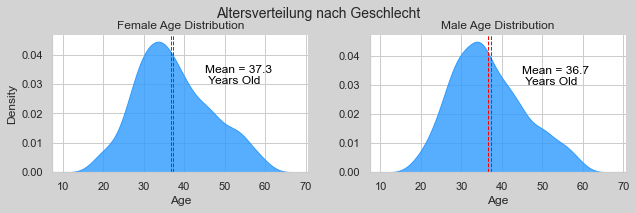

In [ ]:
# Altersverteilung nach Geschlecht
sns.set(style="whitegrid")

# Datensätze vorbereiten
mean_age_female = df[df['Gender'] == 'Female']['Age'].mean()
mean_age_male = df[df['Gender'] == 'Male']['Age'].mean()
dat_text = pd.DataFrame({
    'label': [f"Mean = {mean_age_female:.2f} \n Years Old", f"Mean = {mean_age_male:.2f} \n Years Old"],
    'Gender': ['Female', 'Male']
})

# Erstellen des FacetGrid
gender_dist = sns.FacetGrid(df[df['Gender'].isin(['Female', 'Male'])], col="Gender", sharey=False, aspect=1.5)
gender_dist.map(sns.kdeplot, 'Age', fill=True, alpha=0.8, color="#2E9AFE")
gender_dist.map(plt.axvline, x=mean_age_female, color='red', linestyle='--', lw=1)
gender_dist.map(plt.axvline, x=mean_age_male, color='red', linestyle='--', lw=1)

for ax, gender in zip(gender_dist.axes.flat, ['Female', 'Male']):
    mean_age = mean_age_female if gender == 'Female' else mean_age_male
    ax.text(45, 0.03, f'Mean = {mean_age:.1f} \n Years Old', ha='left', fontsize=12, color='black')

gender_dist.set_titles("{col_name} Age Distribution")
plt.subplots_adjust(top=5.75)
gender_dist.set_axis_labels('Age', 'Density')
plt.subplots_adjust(top=0.85)
gender_dist.fig.patch.set_facecolor('lightgrey')
gender_dist.fig.suptitle('Altersverteilung nach Geschlecht', size=14)
plt.show()

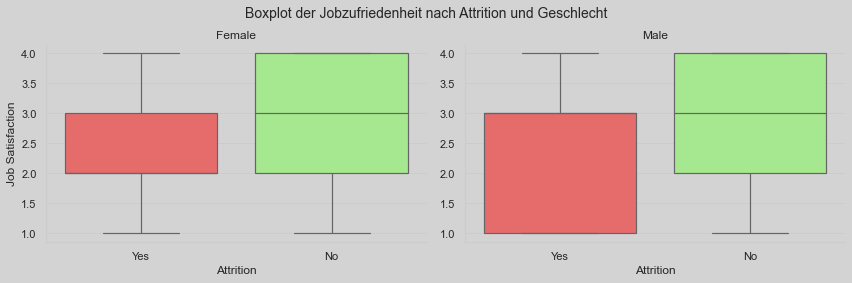

In [ ]:
# Boxplot der Jobzufriednheit nach Geschlecht
sns.set(style="whitegrid")

attrition_order = ['Yes', 'No']
g = sns.FacetGrid(df, col="Gender", sharey=False, height=4, aspect=1.5, palette={"Yes": "#FA5858", "No": "#9FF781"})
g.map(sns.boxplot, 'Attrition', 'JobSatisfaction', order=attrition_order, linewidth=1.2, palette={"Yes": "#FA5858", "No": "#9FF781"})

# Grafik formatieren
g.set_titles("{col_name}")
g.set_axis_labels('Attrition', 'Job Satisfaction')
g.fig.suptitle('Boxplot der Jobzufriedenheit nach Attrition und Geschlecht', size=14)
plt.subplots_adjust(top=0.85)

g.fig.patch.set_facecolor('lightgrey')
for ax in g.axes.flat:
    ax.set_facecolor('lightgrey')

Differenz: € 306.06


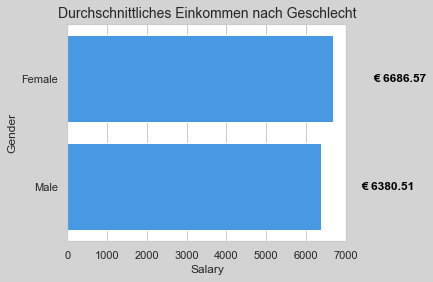

In [ ]:
# Berechne das durchschnittliche Einkommen nach Geschlecht
gender_income = df.groupby('Gender')['MonthlyIncome'].mean().round(2).reset_index()
gender_income.rename(columns={'MonthlyIncome': 'avg_income'}, inplace=True)

# Barplot für das durchschnittliche Einkommen nach Geschlecht
plt.figure(figsize=(5, 4), facecolor='lightgrey')
income_plot = sns.barplot(data=gender_income, x='avg_income', y='Gender', color="#2E9AFE")
income_plot.set_title('Durchschnittliches Einkommen nach Geschlecht', size=14)
income_plot.set_xlabel('Salary')
income_plot.set_ylabel('Gender')

for p in income_plot.patches:
    width = p.get_width()
    income_plot.text(width + 1000, p.get_y() + p.get_height() / 2,
                     f'€ {width:.2f}',
                     ha='left', va='center',
                     color='black', fontweight='bold')

# Differenz
income_diff = gender_income['avg_income'].max() - gender_income['avg_income'].min()
print(f'Differenz: € {income_diff:.2f}')

**Bildung**

Nun wollen wir betrachten, ob ein Zusammenhang zwischen dem Bildungsstand und dem Verlassen in einem Unternehmen besteht. Dabei lässt sich erkennen, dass die Verteilung recht ausgeglichen ist. Nur Personen mit eine, Phd D. verlassen seltener das Unternehmen

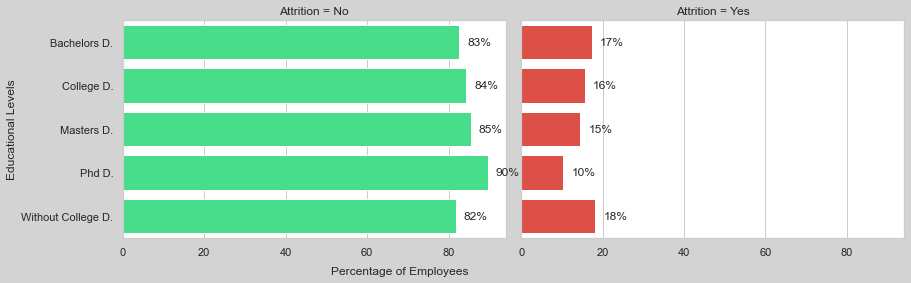

In [ ]:
# Mapping
education_mapping = {
    1: "Without College D.",
    2: "College D.",
    3: "Bachelors D.",
    4: "Masters D.",
    5: "Phd D."
}
df['Educational_Levels'] = df['Education'].map(education_mapping)

# Zählen der Anzahl der Mitarbeiter nach Bildungsstufen und Attrition
edu_level_counts = df.groupby(['Educational_Levels', 'Attrition']).size().reset_index(name='n')
total_counts = df.groupby('Educational_Levels').size().reset_index(name='total')
edu_level_counts = edu_level_counts.merge(total_counts, on='Educational_Levels')
edu_level_counts['percentage'] = (edu_level_counts['n'] / edu_level_counts['total']) * 100

# Erstelle die Subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 4), sharey=True, sharex=True, facecolor='lightgrey')

# Plot für Attrition = 'No'
sns.barplot(data=edu_level_counts[edu_level_counts['Attrition'] == 'No'],
            x='percentage', y='Educational_Levels', ax=axes[0],
            palette=['#2EF688'])
axes[0].set_title('Attrition = No')
axes[0].set_ylabel('Educational Levels')
axes[0].set_xlabel('')

# Plot für Attrition = 'Yes'
sns.barplot(data=edu_level_counts[edu_level_counts['Attrition'] == 'Yes'],
            x='percentage', y='Educational_Levels', ax=axes[1],
            palette=['#F63A2E'])
axes[1].set_title('Attrition = Yes')
axes[1].set_xlabel('')
axes[1].set_ylabel('')

# Anpassungen Grafiken
fig.text(0.4, 0.01, 'Percentage of Employees', ha='center', va='center', fontsize=12)

for ax in axes:
    for p in ax.patches:
        ax.text(p.get_width() + 2, p.get_y() + p.get_height() / 2., f'{p.get_width():.0f}%', ha="left", va="center")

plt.subplots_adjust(wspace=0.04, hspace=0.1)
plt.show()

**Zufriedenheit**

Es gibt drei Variablen, die Auskunft über die Zufriedenheit der Mitarbeitenden geben:
* EnvironmentSatisfaction
* JobSatisfaction
* RelationshipSatisfaction

Hier schauen wir uns an, ob es eine Korrelation zwischen den Variablen gibt, um zu identifizieren, ob diese miteinander zusammenhängen und wir uns für unsere Analyse auf eine dieser Variablen beschränken können.

Die folgende Korrelationmatrix zeigt, dass es keinen Zusammenhang zwischen diesen Variablen gibt.
Daher werden in der folgenden Analyse alle drei Variablen beibehalten.

<AxesSubplot:>

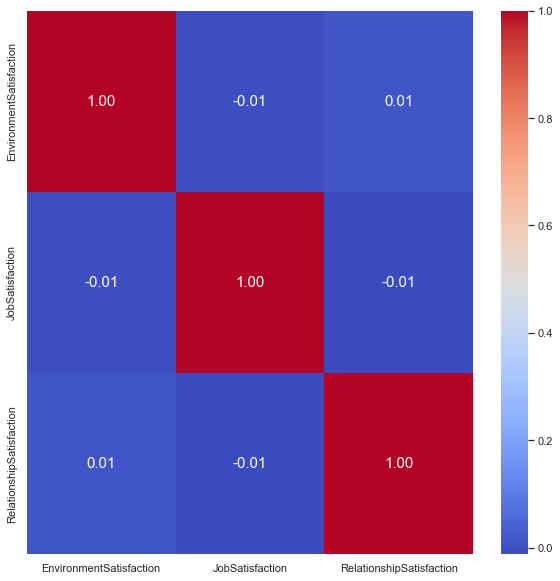

In [ ]:
# Prüfung, ob Korrelationen zwischen den Zufriedenheits-Variablen besteht

Satisfaction = df[['EnvironmentSatisfaction','JobSatisfaction','RelationshipSatisfaction']]
Satisfaction.corr()

plt.figure(figsize=(10,10))
sns.heatmap(Satisfaction.corr(), annot=True, fmt=".2f", cmap="coolwarm", annot_kws={"size":15})

**Einkommen**

Bisher haben wir festgestellt, dass das durchschnittliche Einkommen geschlechterneutral ist. Nun wollen wir uns anschauen, ob das Einkommen abhängig von der Abteilung ist. Zusätzlich wollen wir uns anschauen, ob es einen Unterschied im Gehalt gibt von Personen, die das Unternehmen verlassen haben oder geblieben sind.

Hierbei zeigt sich ein signifikanter Unterschied zwischen dem durchschnittlichen Einkommen von Personen die bleiben und Personen, die das Unternehmen verlassen.

Es lässt sich auch feststellen, dass sich die Werte zwar ändern, wenn man anstatt des Mittelwertes den Median verwendet, jedoch ändert sich die Schlussfolgerung nicht.

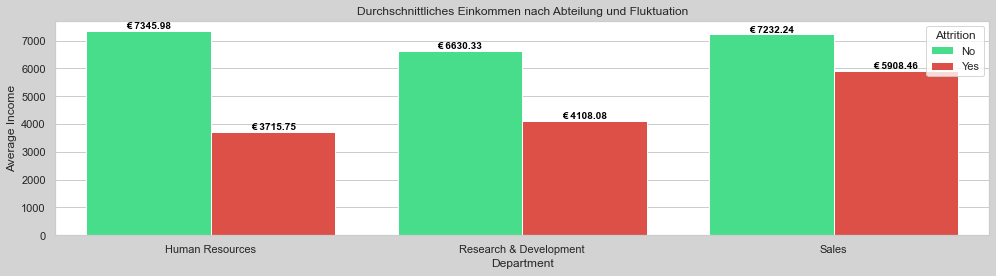

In [ ]:
# Durchschnittliches Einkommen nach Abteilung und Attrition berechnen
avg_income = df.groupby(['Attrition', 'Department']).agg(avg_inc=('MonthlyIncome', 'mean')).reset_index()

# Grafik 
fig, ax = plt.subplots(figsize=(14, 4), facecolor='lightgrey')

sns.barplot(data=avg_income, x='Department', y='avg_inc', hue='Attrition', ax=ax, palette=['#2EF688', '#F63A2E'], dodge=True)

ax.set_title('Durchschnittliches Einkommen nach Abteilung und Fluktuation')
ax.set_xlabel('Department')
ax.set_ylabel('Average Income')

ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.00, f"€ {height:.2f}",
            ha="center", va="bottom", fontsize=10, fontweight='bold', color='black', rotation=0)


plt.tight_layout()
plt.show()

In [ ]:
# Berechnung von Durchschnitt, Median, Minimum und Maximum des Einkommens pro Abteilung
summary_stats = df.groupby('Department').agg(
    min_income=('MonthlyIncome', 'min'),
    max_income=('MonthlyIncome', 'max'),
    avg_income=('MonthlyIncome', 'mean'),
    median_income=('MonthlyIncome', 'median')
).reset_index()

summary_stats['difference'] = summary_stats['avg_income'] - summary_stats['median_income']
summary_stats = summary_stats.round({'min_income': 2, 'max_income': 2, 'avg_income': 2, 'median_income': 2, 'difference':2 })

# Anzeigen der Tabelle
print(summary_stats)

               Department  min_income  max_income  avg_income  median_income  \
0         Human Resources        1555       19717     6654.51         3886.0   
1  Research & Development        1009       19999     6281.25         4374.0   
2                   Sales        1052       19847     6959.17         5754.5   

   difference  
0     2768.51  
1     1907.25  
2     1204.67  


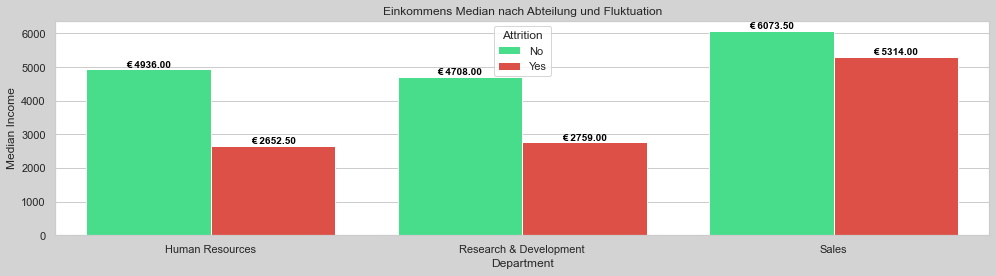

In [ ]:
# Einkommens Median nach Abteilung und Attrition berechnen
median_income = df.groupby(['Attrition', 'Department']).agg(median_inc=('MonthlyIncome', 'median')).reset_index()

# Grafik 
fig, ax = plt.subplots(figsize=(14, 4), facecolor='lightgrey')

sns.barplot(data=median_income, x='Department', y='median_inc', hue='Attrition', ax=ax, palette=['#2EF688', '#F63A2E'], dodge=True)

ax.set_title('Einkommens Median nach Abteilung und Fluktuation')
ax.set_xlabel('Department')
ax.set_ylabel('Median Income')

ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.00, f"€ {height:.2f}",
            ha="center", va="bottom", fontsize=10, fontweight='bold', color='black', rotation=0)


plt.tight_layout()
plt.show()

**Einflüsse auf das Arbeitsumfeld**

Darüberhinaus haben wir noch weitere Kennzahlen mit unserer Zielvariablen gegenübergestellt.

Nun betrachten wir, ob man einen Unterschied zwischen der **Zufriedenheit der Mitrabeitenden** zu finden ist.
Dazu nehmen wir die drei Zufriedenheitsvariablen zur Hand, die oben schon beschrieben waren. Dabei lässt sich erkennen, dass die durchschnittlichen Zufrienheitswerte je Feature nur minimal voneinander abweichen. Dadurch ist die Aussage der einzelnen Variablen identisch. Personen die Zufriedener sind, bleiben auch eher im Unternehmen. Jedoch ist der Unterschied in der Zufriednheit nur gering anders.
Bei der minimalen und maximalen Auspärgung lässt sich kein Unterschied in der Attrition feststellen.

Ein größere Einfluss hat der **Arbeitsweg** darauf, ob ein Mitarbeitender geht. Es lässt sich erkennen, dass die Mitarbeitenden, die das Unternehmen verlassen im Schnitt einen längeren Arbeitsweg haben, als Mitarbeitende, die im Unternehmen bleiben.

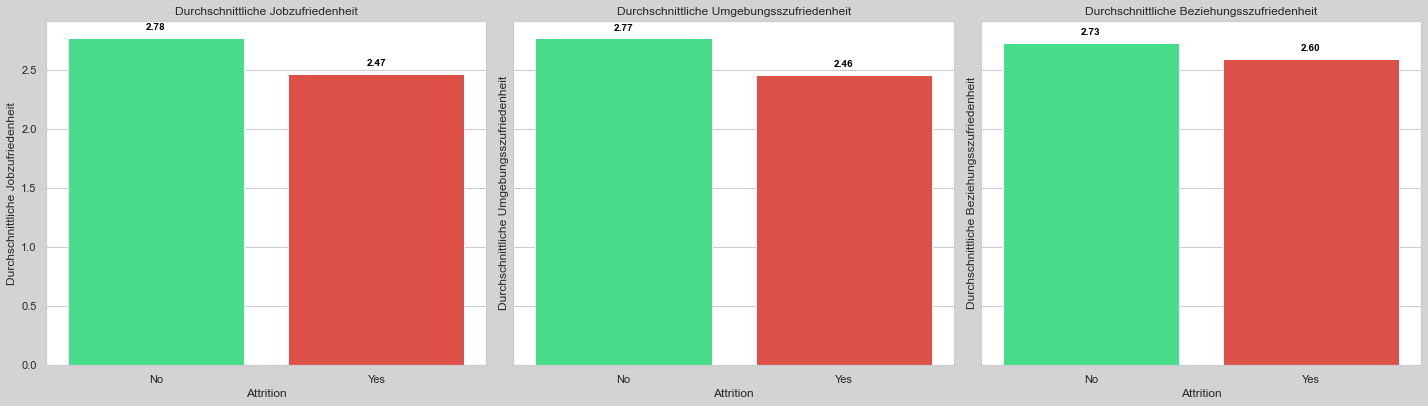

In [ ]:
# Durchschnittliche Zufriedenheit berechnen
avg_satisfaction = df.groupby('Attrition').agg(
    avg_job_sat=('JobSatisfaction', 'mean'),
    avg_env_sat=('EnvironmentSatisfaction', 'mean'),
    avg_rel_sat=('RelationshipSatisfaction', 'mean')
).reset_index()

# Erstelle die Subplots
fig, axes = plt.subplots(1, 3, figsize=(20, 5.8), sharey=True, facecolor='lightgrey')

# Job Satisfaction Plot
sns.barplot(data=avg_satisfaction, x='Attrition', y='avg_job_sat', ax=axes[0], palette=['#2EF688', '#F63A2E'])
axes[0].set_title('Durchschnittliche Jobzufriedenheit')
axes[0].set_xlabel('Attrition')
axes[0].set_ylabel('Durchschnittliche Jobzufriedenheit')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=0)
for p in axes[0].patches:
    height = p.get_height()
    axes[0].text(p.get_x() + p.get_width() / 2., height + 0.05, f"{height:.2f}", ha="center", va="bottom", fontsize=10, fontweight='bold', color='black')

# Environment Satisfaction Plot
sns.barplot(data=avg_satisfaction, x='Attrition', y='avg_env_sat', ax=axes[1], palette=['#2EF688', '#F63A2E'])
axes[1].set_title('Durchschnittliche Umgebungsszufriedenheit')
axes[1].set_xlabel('Attrition')
axes[1].set_ylabel('Durchschnittliche Umgebungsszufriedenheit')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=0)
for p in axes[1].patches:
    height = p.get_height()
    axes[1].text(p.get_x() + p.get_width() / 2., height + 0.05, f"{height:.2f}", ha="center", va="bottom", fontsize=10, fontweight='bold', color='black')

# Relationship Satisfaction Plot
sns.barplot(data=avg_satisfaction, x='Attrition', y='avg_rel_sat', ax=axes[2], palette=['#2EF688', '#F63A2E'])
axes[2].set_title('Durchschnittliche Beziehungsszufriedenheit')
axes[2].set_xlabel('Attrition')
axes[2].set_ylabel('Durchschnittliche Beziehungsszufriedenheit')
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=0)
for p in axes[2].patches:
    height = p.get_height()
    axes[2].text(p.get_x() + p.get_width() / 2., height + 0.05, f"{height:.2f}", ha="center", va="bottom", fontsize=10, fontweight='bold', color='black')

# Layout
plt.tight_layout()
plt.show()

In [ ]:
# Berechnung der minimalen und maximalen Werte für jedes Zufriedenheits-Feature
min_max_values = df.groupby('Attrition').agg(
    min_job_sat=('JobSatisfaction', 'min'),
    max_job_sat=('JobSatisfaction', 'max'),
    min_env_sat=('EnvironmentSatisfaction', 'min'),
    max_env_sat=('EnvironmentSatisfaction', 'max'),
    min_rel_sat=('RelationshipSatisfaction', 'min'),
    max_rel_sat=('RelationshipSatisfaction', 'max')
).reset_index()

# Rundung der Werte auf zwei Dezimalstellen
min_max_values = min_max_values.round({'min_job_sat': 2, 'max_job_sat': 2,
                                        'min_env_sat': 2, 'max_env_sat': 2,
                                        'min_rel_sat': 2, 'max_rel_sat': 2})

print(min_max_values)

  Attrition  min_job_sat  max_job_sat  min_env_sat  max_env_sat  min_rel_sat  \
0        No            1            4            1            4            1   
1       Yes            1            4            1            4            1   

   max_rel_sat  
0            4  
1            4  


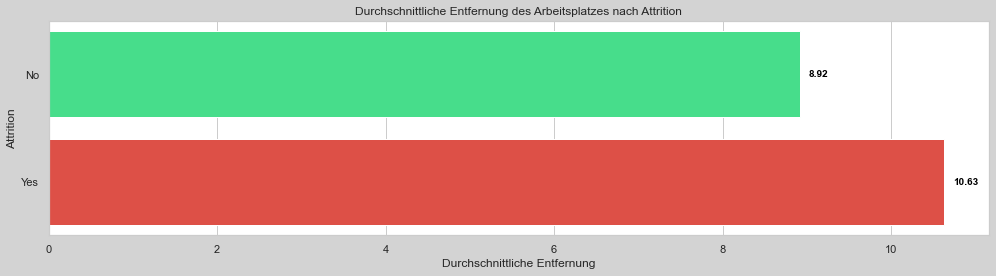

In [ ]:
# Durchschnittliche Entfernung des Arbeitsplatzes nach Attrition berechnen
avg_distance = df.groupby('Attrition')['DistanceFromHome'].mean().reset_index()
avg_distance.columns = ['Attrition', 'AverageDistance']

# Erstelle die Subplots
fig, ax = plt.subplots(figsize=(14, 4), facecolor='lightgrey')

# Balkendiagramm erstellen
sns.barplot(data=avg_distance, x='AverageDistance', y='Attrition', ax=ax, palette=['#2EF688', '#F63A2E'])

# Setze Titel und Achsenbeschriftungen
ax.set_title('Durchschnittliche Entfernung des Arbeitsplatzes nach Attrition')
ax.set_xlabel('Durchschnittliche Entfernung')
ax.set_ylabel('Attrition')

# Werte auf den Balken anzeigen
for p in ax.patches:
    width = p.get_width()
    ax.text(width + 0.1, p.get_y() + p.get_height() / 2., f'{width:.2f}', 
            ha="left", va="center", fontsize=10, fontweight='bold', color='black')

# Layout optimieren
plt.tight_layout()

# Zeige die Grafik
plt.show()

### Data Preparation

Für die weitere Anwendung müssen die Variablen mit den Datentyp "Object" in numerische Form oder Booleans kodiert werden. Eine Möglichkeit das zu tun ist One-Hot-Encoding, welches für jede Merkmalsausprägung eine eigene Spalte erzeugt, welche True oder False sein kann.

Hier ist eine Übersicht der betreffenden Variablen mit der Bedeutung:

| Feature        | Datentype | Ausprägung                                                                                                                                                                                                                                    | Beschreibung                                  |
| -------------- | --------- | --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- | --------------------------------------------- |
| Attrition      | object    | 1 - Yes,<br>0 - No                                                                                                                                                                                                                            | Befragte Person hat das Unternehmen verlassen |
| BusinessTravel | object    | 0 - No Travel,<br>1 - Travel_Rarely,<br>2 - Travel_Frequently                                                                                                                                                                                 | Häufigkeit von Dienstreisen                   |
| Department     | object    | 0 - Human Resources,<br>1 - Research & Development,<br>2 - Sales                                                                                                                                                                              | Abteilung                                     |
| Gender         | object    | 0 - Male,<br>1 - Female                                                                                                                                                                                                                       | Geschlecht                                    |
| JobRole        | object    | 0 - Sales Executive,<br>1 - Research Scientist,<br>2 - Laboratory Technician,<br>3 - Manufacturing Director,<br>4 - Healthcare, Representative,<br>5 - Manager,<br>6 - Sales Representative,<br>7 - Research Director,<br>8 - Human Resources | Stellenbeschreibung                           |
| MaritalStatus  | object    | 0 - Married,<br>1 - Divorced,<br>2 - Single                                                                                                                                                                                                   | Familienstand                                 |
| OverTime       | object    | 1 - Yes,<br>0 - No                                                                                                                                                                                                                            | Überstunden                                   |

In [ ]:
# One-Hot Encoding
one_hot_encoded_df = pd.get_dummies(df, columns=['Attrition',
                                                 'BusinessTravel',
                                                 'Department',
                                                 'Gender',
                                                 'JobRole',
                                                 'MaritalStatus',
                                                 'OverTime'])

one_hot_encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 41 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Age                                1470 non-null   int64
 1   DistanceFromHome                   1470 non-null   int64
 2   Education                          1470 non-null   int64
 3   EnvironmentSatisfaction            1470 non-null   int64
 4   JobInvolvement                     1470 non-null   int64
 5   JobLevel                           1470 non-null   int64
 6   JobSatisfaction                    1470 non-null   int64
 7   MonthlyIncome                      1470 non-null   int64
 8   NumCompaniesWorked                 1470 non-null   int64
 9   RelationshipSatisfaction           1470 non-null   int64
 10  PerformanceRating                  1470 non-null   int64
 11  TotalWorkingYears                  1470 non-null   int64
 12  WorkLifeBalance     

In [ ]:
one_hot_encoded_df.head()

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,RelationshipSatisfaction,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,41,1,2,2,3,2,4,5993,8,1,...,False,False,False,True,False,False,False,True,False,True
1,49,8,1,3,2,2,2,5130,1,4,...,False,False,True,False,False,False,True,False,True,False
2,37,2,2,4,2,1,3,2090,6,2,...,False,False,False,False,False,False,False,True,False,True
3,33,3,4,4,3,1,3,2909,1,3,...,False,False,True,False,False,False,True,False,False,True
4,27,2,1,1,3,1,2,3468,9,4,...,False,False,False,False,False,False,True,False,True,False
